In [20]:
import warnings
warnings.filterwarnings("ignore")


In [1]:
import pandas as pd
import numpy as np



In [25]:
house_data=pd.read_excel("Case Study 1 Data.xlsx")

In [26]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Property ID  247172 non-null  object        
 1   Location     247172 non-null  object        
 2   Size         244701 non-null  float64       
 3   Bedrooms     238769 non-null  float64       
 4   Bathrooms    240499 non-null  float64       
 5   Year Built   234567 non-null  float64       
 6   Condition    236544 non-null  object        
 7   Type         247172 non-null  object        
 8   Date Sold    247172 non-null  datetime64[ns]
 9   Price        241735 non-null  float64       
dtypes: datetime64[ns](1), float64(5), object(4)
memory usage: 18.9+ MB


In [27]:
house_data.head()

,Property ID,Location,Size,Bedrooms,Bathrooms,Year Built,Condition,Type,Date Sold,Price
0,SI_000001,CityA,3974.0,2.0,2.0,2007.0,Good,Single Family,2020-11-02,324000.0
1,SI_000002,CityA,1660.0,2.0,3.0,1934.0,Good,Single Family,2022-10-23,795000.0
2,SI_000003,CityC,2094.0,2.0,2.0,1950.0,Good,Single Family,2020-11-30,385000.0
3,SI_000004,CityB,1930.0,2.0,3.0,1905.0,Good,Single Family,2021-12-09,651000.0
4,SI_000005,CityB,1895.0,5.0,2.0,1936.0,New,Single Family,2024-10-30,1878000.0


In [28]:
house_data['Location'].unique()

array(['CityA', 'CityC', 'CityB', 'CityD'], dtype=object)

In [29]:
house_data['Type'].unique()

array(['Single Family', 'Condominium', 'Townhouse'], dtype=object)

In [30]:
house_data['Condition'].unique()

array(['Good', 'New', 'Poor', 'Fair', nan], dtype=object)

In [31]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Sample DataFrame (Assuming your data is loaded as df)
df = house_data

# Extract year from 'Date Sold' column
df["Year Sold"] = df["Date Sold"].dt.year

# Create 'House Age' column
df["House Age"] = df["Year Sold"] - df["Year Built"]

# Fill missing values for 'House Age' with median
df["House Age"].fillna(df["House Age"].median(), inplace=True)

# Drop redundant columns
df.drop(columns=["Year Built", "Year Sold", "Date Sold", "Property ID"], inplace=True)

# One-Hot Encoding for categorical variables
categorical_cols = ["Location", "Condition", "Type"]
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Display transformed DataFrame
print(df.head())


     Size  Bedrooms  Bathrooms      Price  House Age  Location_CityB  \
0  3974.0       2.0        2.0   324000.0       13.0           False   
1  1660.0       2.0        3.0   795000.0       88.0           False   
2  2094.0       2.0        2.0   385000.0       70.0           False   
3  1930.0       2.0        3.0   651000.0      116.0            True   
4  1895.0       5.0        2.0  1878000.0       88.0            True   

   Location_CityC  Location_CityD  Condition_Good  Condition_New  \
0           False           False            True          False   
1           False           False            True          False   
2            True           False            True          False   
3           False           False            True          False   
4           False           False           False           True   

   Condition_Poor  Type_Single Family  Type_Townhouse  
0           False                True           False  
1           False                True         

In [32]:
df.head()

,Size,Bedrooms,Bathrooms,Price,House Age,Location_CityB,Location_CityC,Location_CityD,Condition_Good,Condition_New,Condition_Poor,Type_Single Family,Type_Townhouse
0,3974.0,2.0,2.0,324000.0,13.0,False,False,False,True,False,False,True,False
1,1660.0,2.0,3.0,795000.0,88.0,False,False,False,True,False,False,True,False
2,2094.0,2.0,2.0,385000.0,70.0,False,True,False,True,False,False,True,False
3,1930.0,2.0,3.0,651000.0,116.0,True,False,False,True,False,False,True,False
4,1895.0,5.0,2.0,1878000.0,88.0,True,False,False,False,True,False,True,False


In [33]:
bool_cols = ["Location_CityB","Location_CityC" ,"Location_CityD","Condition_New",'Condition_Poor','Condition_Good','Type_Single Family', "Type_Townhouse"]
df[bool_cols] = df[bool_cols].astype(int)


In [34]:
df.head()

,Size,Bedrooms,Bathrooms,Price,House Age,Location_CityB,Location_CityC,Location_CityD,Condition_Good,Condition_New,Condition_Poor,Type_Single Family,Type_Townhouse
0,3974.0,2.0,2.0,324000.0,13.0,0,0,0,1,0,0,1,0
1,1660.0,2.0,3.0,795000.0,88.0,0,0,0,1,0,0,1,0
2,2094.0,2.0,2.0,385000.0,70.0,0,1,0,1,0,0,1,0
3,1930.0,2.0,3.0,651000.0,116.0,1,0,0,1,0,0,1,0
4,1895.0,5.0,2.0,1878000.0,88.0,1,0,0,0,1,0,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Size                244701 non-null  float64
 1   Bedrooms            238769 non-null  float64
 2   Bathrooms           240499 non-null  float64
 3   Price               241735 non-null  float64
 4   House Age           247172 non-null  float64
 5   Location_CityB      247172 non-null  int32  
 6   Location_CityC      247172 non-null  int32  
 7   Location_CityD      247172 non-null  int32  
 8   Condition_Good      247172 non-null  int32  
 9   Condition_New       247172 non-null  int32  
 10  Condition_Poor      247172 non-null  int32  
 11  Type_Single Family  247172 non-null  int32  
 12  Type_Townhouse      247172 non-null  int32  
dtypes: float64(5), int32(8)
memory usage: 17.0 MB


In [36]:
# Fill missing values in numerical columns with median
df["Size"].fillna(df["Size"].median(), inplace=True)
df["Bedrooms"].fillna(df["Bedrooms"].median(), inplace=True)
df["Bathrooms"].fillna(df["Bathrooms"].median(), inplace=True)
df["Price"].fillna(df["Price"].median(), inplace=True)

# Verify that no missing values remain
print(df.isnull().sum())


Size                  0
Bedrooms              0
Bathrooms             0
Price                 0
House Age             0
Location_CityB        0
Location_CityC        0
Location_CityD        0
Condition_Good        0
Condition_New         0
Condition_Poor        0
Type_Single Family    0
Type_Townhouse        0
dtype: int64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247172 entries, 0 to 247171
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Size                247172 non-null  float64
 1   Bedrooms            247172 non-null  float64
 2   Bathrooms           247172 non-null  float64
 3   Price               247172 non-null  float64
 4   House Age           247172 non-null  float64
 5   Location_CityB      247172 non-null  int32  
 6   Location_CityC      247172 non-null  int32  
 7   Location_CityD      247172 non-null  int32  
 8   Condition_Good      247172 non-null  int32  
 9   Condition_New       247172 non-null  int32  
 10  Condition_Poor      247172 non-null  int32  
 11  Type_Single Family  247172 non-null  int32  
 12  Type_Townhouse      247172 non-null  int32  
dtypes: float64(5), int32(8)
memory usage: 17.0 MB


In [38]:
df.to_csv("processed_house_data.csv", index=False)


In [39]:
data=pd.read_csv("processed_house_data.csv")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
import joblib

warnings.filterwarnings("ignore")

# Load processed dataset
df = pd.read_csv("processed_house_data.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features (for Linear Models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Store results
results = {}

print("\nModel Performance:")
print("-" * 50)

for name, model in models.items():
    # Use scaled features for linear models
    if "Regression" in name:
        model.fit(X_train_scaled, y_train)
        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)
    else:  # Tree-based models don't need scaling
        model.fit(X_train, y_train)
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

    # Compute RMSE and R²
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {"Train RMSE": train_rmse, "Test RMSE": test_rmse, 
                     "Train R²": train_r2, "Test R²": test_r2}

    print(f"{name}:")
    print(f"  - Train RMSE = {train_rmse:.4f}, Test RMSE = {test_rmse:.4f}")
    print(f"  - Train R² = {train_r2:.4f}, Test R² = {test_r2:.4f}")

# Select best model based on test RMSE
best_model = min(results, key=lambda x: results[x]["Test RMSE"])

print("\nBest performing model:")
print(f"{best_model} -> Train RMSE: {results[best_model]['Train RMSE']:.4f}, Test RMSE: {results[best_model]['Test RMSE']:.4f}")
print(f"            Train R²: {results[best_model]['Train R²']:.4f}, Test R²: {results[best_model]['Test R²']:.4f}")

# Save the best model
final_model = models[best_model]
final_model.fit(X, y)
joblib.dump(final_model, "best_house_price_model.pkl")
print("Best model saved successfully!")


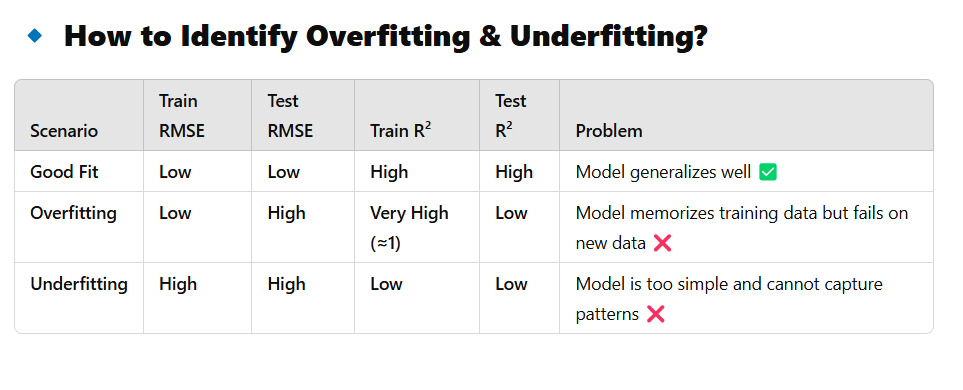

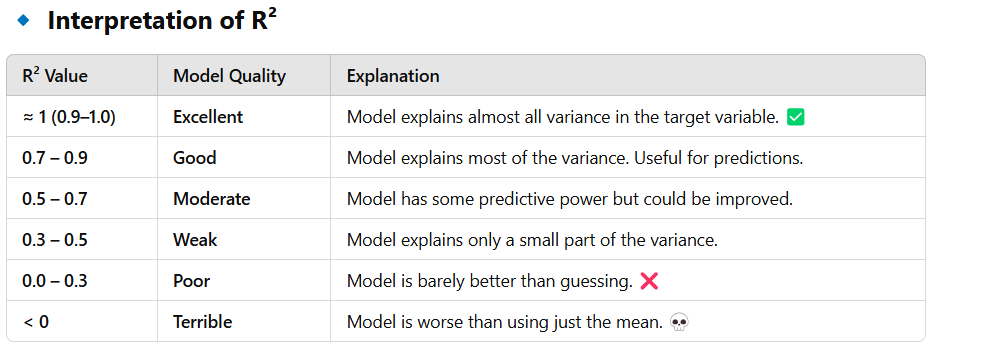

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore")

# Load dataset
df = pd.read_csv("processed_house_data.csv")

# Define features (X) and target variable (y)
X = df.drop(columns=["Price"])  # Features
y = df["Price"]  # Target

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (Neural Networks require normalized input)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----------- Build Neural Network -----------
model = keras.Sequential([
    keras.layers.Dense(128, activation="relu", input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(1)  # Output layer for regression
])

# Compile Model
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

# Train Model
history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), 
                    epochs=100, batch_size=32, verbose=1)  # Change verbose=0 for silent training

# ----------- Evaluate Performance -----------
y_train_pred = model.predict(X_train_scaled).flatten()
y_test_pred = model.predict(X_test_scaled).flatten()

# Compute RMSE and R²
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("\n📊 Neural Network Performance:")
print(f"✅ Train RMSE: {train_rmse:.4f}, Test RMSE: {test_rmse:.4f}")
print(f"✅ Train R²: {train_r2:.4f}, Test R²: {test_r2:.4f}")

# Save the trained model
#model.save("house_price_nn_model.h5")
#print("\n✅ Neural Network Model Saved Successfully!")
#

## Best Model iS XGBOOST

#### NOW lets deploy it 

In [68]:
import pickle
import pandas as pd
from fastapi import FastAPI
from pydantic import BaseModel

# Load the model from pickle
with open("best_house_price_model.pkl", "rb") as file:
    model = pickle.load(file)

app = FastAPI()

class HouseFeatures(BaseModel):
    Size: float
    Bedrooms: float
    Bathrooms: float
    House_Age: int
    Location_CityB: int
    Location_CityC: int
    Location_CityD: int
    Condition_Good: int
    Condition_New: int
    Condition_Poor: int
    Type_Single_Family: int
    Type_Townhouse: int

@app.post("/predict")
def predict_price(features: HouseFeatures):
    input_data = pd.DataFrame([features.dict()])
    prediction = model.predict(input_data)
    return {"predicted_price": prediction[0]}

# Run API: uvicorn filename:app --host 0.0.0.0 --port 8000 --reload


In [72]:
import streamlit as st
import requests

st.title("🏡 House Price Prediction App")

st.write("Enter house details below to predict the price:")

# User inputs
size = st.number_input("Size (sqft)", min_value=500, max_value=10000, step=50)
bedrooms = st.number_input("Bedrooms", min_value=1, max_value=10, step=1)
bathrooms = st.number_input("Bathrooms", min_value=1, max_value=10, step=1)
house_age = st.number_input("House Age (years)", min_value=0, max_value=100, step=1)

# Location Encoding
location = st.selectbox("Location", ["CityA", "CityB", "CityC", "CityD"])
location_encoding = {"CityA": [0, 0, 0], "CityB": [1, 0, 0], "CityC": [0, 1, 0], "CityD": [0, 0, 1]}

# Condition Encoding
condition = st.selectbox("Condition", ["Good", "New", "Poor"])
condition_encoding = {"Good": [1, 0, 0], "New": [0, 1, 0], "Poor": [0, 0, 1]}

# House Type Encoding
house_type = st.selectbox("House Type", ["Single Family", "Townhouse"])
house_type_encoding = {"Single Family": [1, 0], "Townhouse": [0, 1]}

# Button to predict
if st.button("Predict Price"):
    data = {
        "Size": size,
        "Bedrooms": bedrooms,
        "Bathrooms": bathrooms,
        "House_Age": house_age,
        "Location_CityB": location_encoding[location][0],
        "Location_CityC": location_encoding[location][1],
        "Location_CityD": location_encoding[location][2],
        "Condition_Good": condition_encoding[condition][0],
        "Condition_New": condition_encoding[condition][1],
        "Condition_Poor": condition_encoding[condition][2],
        "Type_Single_Family": house_type_encoding[house_type][0],
        "Type_Townhouse": house_type_encoding[house_type][1],
    }
    
    # Send request to FastAPI
    api_url = "http://127.0.0.1:8000/predict"  # Update this if deploying
    response = requests.post(api_url, json=data)
    prediction = response.json()

    st.success(f"🏠 Predicted House Price: ${prediction['predicted_price']:,.2f}")
